Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from termcolor import colored




In [2]:
train = pd.read_csv("../OriginalData/train.csv")
test = pd.read_csv("../OriginalData/test.csv")
price = pd.read_csv("../OriginalData/price.csv")


### First look

In [3]:
def check_df(df):
    print(" Shape: ",df.shape)
    print(" Types: ")
    print(df.dtypes)
    print(" Head ")
    display(df.head())
    print(" Info ")
    print(df.info())
    print(" Description ")
    display(df.describe().T)
    print(" NaNs ")
    print(df.isnull().sum())
    print(" QUANTILES ")
    display(df.describe([0, 0.05, 0.50, 0.95, 0.99]).T)

Train Dataset

In [4]:
check_df(train)

 Shape:  (1379260, 7)
 Types: 
Customer          int64
Area             object
City Code         int64
Billing Date     object
Product          object
Plant            object
Litres          float64
dtype: object
 Head 


,Customer,Area,City Code,Billing Date,Product,Plant,Litres
0,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T102,0.0
1,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T155,0.0
2,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T102,0.0
3,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T155,0.0
4,10048261,Karadeniz Bölgesi,883,2014-01-02,Motorin,T155,16685.0


 Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379260 entries, 0 to 1379259
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Customer      1379260 non-null  int64  
 1   Area          1379260 non-null  object 
 2   City Code     1379260 non-null  int64  
 3   Billing Date  1379260 non-null  object 
 4   Product       1379260 non-null  object 
 5   Plant         1379260 non-null  object 
 6   Litres        1379260 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 73.7+ MB
None
 Description 


,count,mean,std,min,25%,50%,75%,max
Customer,1379260.0,1.058131e+07,937804.625043,10048261.0,10049354.0,10049880.0,10057728.0,12664221.0
City Code,1379260.0,6.985216e+02,232.538387,116.0,574.0,812.0,835.0,990.0
Litres,1379260.0,1.405520e+04,10937.352318,0.0,5034.0,11459.0,20050.0,273221.0


 NaNs 
Customer        0
Area            0
City Code       0
Billing Date    0
Product         0
Plant           0
Litres          0
dtype: int64
 QUANTILES 


,count,mean,std,min,0%,5%,50%,95%,99%,max
Customer,1379260.0,1.058131e+07,937804.625043,10048261.0,10048261.0,10048928.0,10049880.0,12462544.0,12534242.0,12664221.0
City Code,1379260.0,6.985216e+02,232.538387,116.0,116.0,218.0,812.0,976.0,990.0,990.0
Litres,1379260.0,1.405520e+04,10937.352318,0.0,0.0,1988.0,11459.0,32711.0,51553.0,273221.0


Test Dataset

In [5]:
check_df(test)

 Shape:  (108472, 6)
 Types: 
index               int64
Customer            int64
Area               object
City Code           int64
Product            object
Week Start Date    object
dtype: object
 Head 


,index,Customer,Area,City Code,Product,Week Start Date
0,0,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-07
1,1,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-14
2,2,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-21
3,3,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-28
4,4,10048261,Karadeniz Bölgesi,883,Motorin,2019-02-04


 Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108472 entries, 0 to 108471
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   index            108472 non-null  int64 
 1   Customer         108472 non-null  int64 
 2   Area             108472 non-null  object
 3   City Code        108472 non-null  int64 
 4   Product          108472 non-null  object
 5   Week Start Date  108472 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.0+ MB
None
 Description 


,count,mean,std,min,25%,50%,75%,max
index,108472.0,5.423550e+04,3.131331e+04,0.0,27117.75,54235.5,81353.25,108471.0
Customer,108472.0,1.089983e+07,1.114908e+06,10048261.0,10049389.00,10050064.0,12243050.00,12739737.0
City Code,108472.0,6.797325e+02,2.402975e+02,116.0,570.00,789.0,835.00,990.0


 NaNs 
index              0
Customer           0
Area               0
City Code          0
Product            0
Week Start Date    0
dtype: int64
 QUANTILES 


,count,mean,std,min,0%,5%,50%,95%,99%,max
index,108472.0,5.423550e+04,3.131331e+04,0.0,0.0,5423.55,54235.5,103047.45,107386.29,108471.0
Customer,108472.0,1.089983e+07,1.114908e+06,10048261.0,10048261.0,10048972.00,10050064.0,12629671.00,12687359.00,12739737.0
City Code,108472.0,6.797325e+02,2.402975e+02,116.0,116.0,174.00,789.0,976.00,990.00,990.0


Price dataset

In [6]:
check_df(price)

 Shape:  (311744, 4)
 Types: 
City Code      int64
Validfrom     object
Product       object
CRP          float64
dtype: object
 Head 


,City Code,Validfrom,Product,CRP
0,116,2016-07-27,Benzin,4.46
1,116,2016-07-28,Benzin,4.46
2,116,2016-07-29,Benzin,4.46
3,116,2016-07-30,Benzin,4.40
4,116,2016-07-31,Benzin,4.40


 Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311744 entries, 0 to 311743
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City Code  311744 non-null  int64  
 1   Validfrom  311744 non-null  object 
 2   Product    311744 non-null  object 
 3   CRP        311744 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.5+ MB
None
 Description 


,count,mean,std,min,25%,50%,75%,max
City Code,311744.0,596.253888,256.890382,116.00,418.00,621.00,812.00,990.00
CRP,311744.0,5.157968,1.015274,3.22,4.39,4.98,6.09,7.38


 NaNs 
City Code    0
Validfrom    0
Product      0
CRP          0
dtype: int64
 QUANTILES 


,count,mean,std,min,0%,5%,50%,95%,99%,max
City Code,311744.0,596.253888,256.890382,116.00,116.00,172.00,621.00,966.00,990.00,990.00
CRP,311744.0,5.157968,1.015274,3.22,3.22,3.76,4.98,6.99,7.18,7.38


In [7]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def grab_col_names(df, cat_th=10,  car_th=20, report=False):
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > car_th and str(df[col].dtypes) in ["category", "object"]]

    # final categorical variables
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # final numerical variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    # report
    if report:
        print(f"Observations: {df.shape[0]}")
        print(f"Variables: {df.shape[1]}")
        print(f'cat_cols: {len(cat_cols)}')
        print(f'num_cols: {len(num_cols)}')
        print(f'cat_but_car: {len(cat_but_car)}')
        print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


dfs = [train, test, price]
for d in dfs:
    name_of_df = " "+ get_df_name(d).upper() + " "
    print(f" {colored(name_of_df.center(50, '~'), 'yellow', attrs=['reverse'])}", "\n")
    cat_cols, num_cols, cat_but_car = grab_col_names(d, report=True)
    print(f"\n{colored('Numerical Columns:','blue', attrs=['reverse'])} {num_cols}\n\n{colored('Categorical Columns:','magenta', attrs=['reverse'])} {cat_cols}\n\n"
          f"{colored('Cardinal Columns:','cyan', attrs=['reverse'])}{cat_but_car}\n")

 ~~~~~~~~~~~~~~~~~~~~~ TRAIN ~~~~~~~~~~~~~~~~~~~~~~ 

Observations: 1379260
Variables: 7
cat_cols: 3
num_cols: 1
cat_but_car: 1
num_but_cat: 0

Numerical Columns: ['Litres']

Categorical Columns: ['Area', 'Product', 'Plant']

Cardinal Columns:['Billing Date']

 ~~~~~~~~~~~~~~~~~~~~~~ TEST ~~~~~~~~~~~~~~~~~~~~~~ 

Observations: 108472
Variables: 6
cat_cols: 2
num_cols: 0
cat_but_car: 1
num_but_cat: 0

Numerical Columns: []

Categorical Columns: ['Area', 'Product']

Cardinal Columns:['Week Start Date']

 ~~~~~~~~~~~~~~~~~~~~~ PRICE ~~~~~~~~~~~~~~~~~~~~~~ 

Observations: 311744
Variables: 4
cat_cols: 1
num_cols: 1
cat_but_car: 1
num_but_cat: 0

Numerical Columns: ['CRP']

Categorical Columns: ['Product']

Cardinal Columns:['Validfrom']



In [8]:
numerical_cols_train=  ['Litres']
categorical_cols_train =  ['Area', 'Product', 'Plant']
date_cols_train= ['Billing Date']
categorical_cols_test =  ['Area', 'Product']
date_cols_test= ['Billing Date']


# Categorical Variables

In [9]:
def plot_categorical(df, col_name):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "% Ratio": round(100 * df[col_name].value_counts() / len(df),2)}), "\n")

    f,ax=plt.subplots(1,2, figsize=(10,4))
    df[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(f"Distribution of {col_name}")
    ax[0].set_ylabel("")
    sns.countplot(x=df[col_name], data=df, ax=ax[1])
    ax[1].set_title(f"Count of {col_name}")
    ax[1].set_xlabel("")
    plt.tight_layout()
    plt.show()

                             Area  % Ratio
Marmara Bölgesi            585965    42.48
Ege Bölgesi                225132    16.32
İç Anadolu Bölgesi         212228    15.39
Akdeniz Bölgesi            171598    12.44
Karadeniz Bölgesi          100001     7.25
Güneydoğu Anadolu Bölgesi   54555     3.96
Doğu Anadolu Bölgesi        29781     2.16 



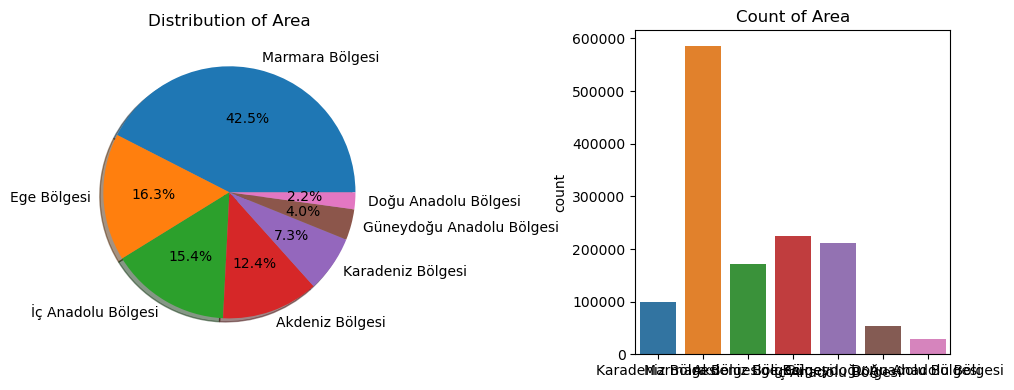

         Product  % Ratio
Motorin   838941    60.83
Benzin    540319    39.17 



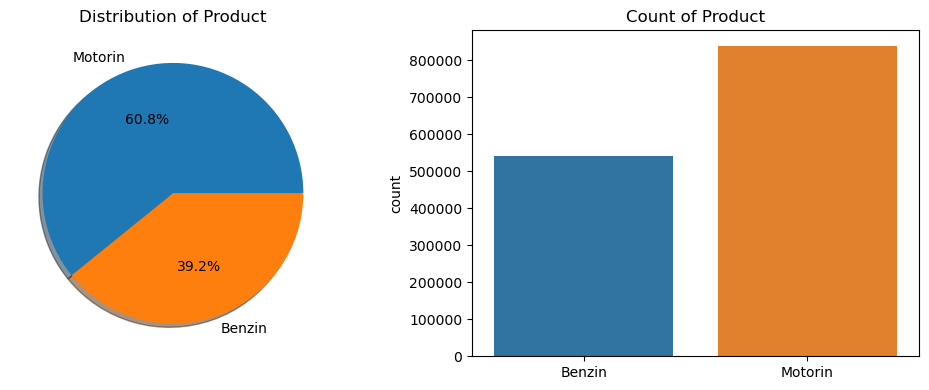

       Plant  % Ratio
T314  249789    18.11
T111  230047    16.68
T102  218470    15.84
T318  149761    10.86
T155  125179     9.08
T105  121468     8.81
T112   92596     6.71
T110   68041     4.93
T120   51877     3.76
T248   18972     1.38
T108   14409     1.04
T107   12406     0.90
T329   11284     0.82
T101    6181     0.45
T317    4664     0.34
T113    2660     0.19
T327    1456     0.11 



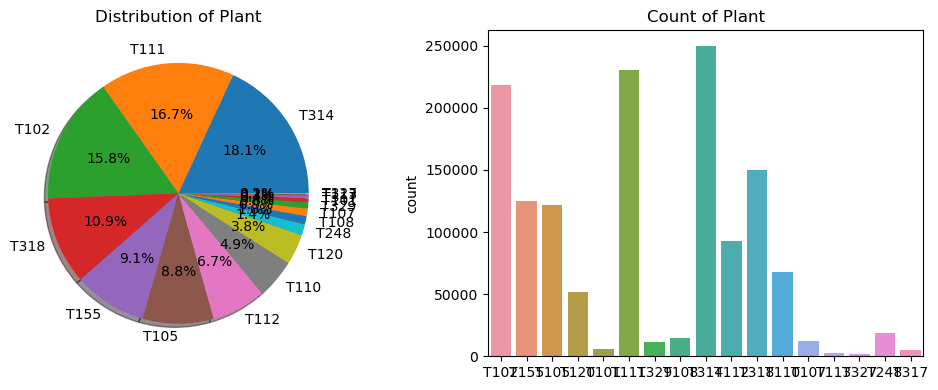

In [10]:
plot_categorical(train,"Area")
plot_categorical(train,"Product")
plot_categorical(train,"Plant")

                            Area  % Ratio
Marmara Bölgesi            36400    33.56
Ege Bölgesi                19864    18.31
İç Anadolu Bölgesi         17784    16.40
Akdeniz Bölgesi            14352    13.23
Karadeniz Bölgesi           9984     9.20
Güneydoğu Anadolu Bölgesi   5824     5.37
Doğu Anadolu Bölgesi        4264     3.93 



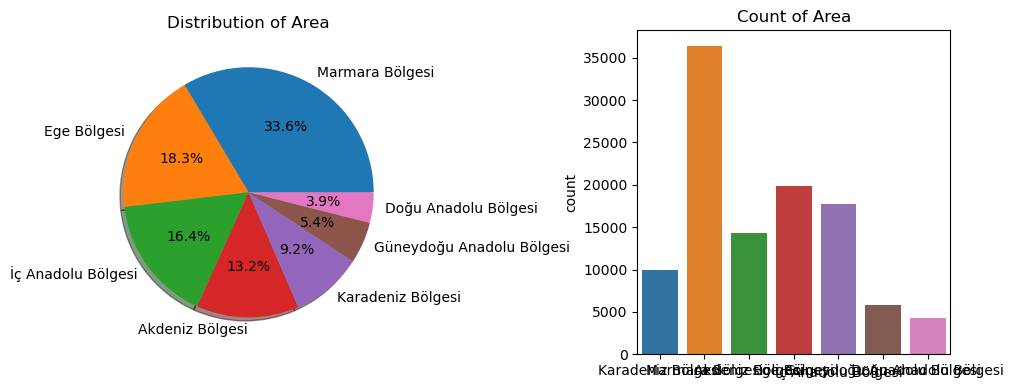

         Product  % Ratio
Motorin    54236     50.0
Benzin     54236     50.0 



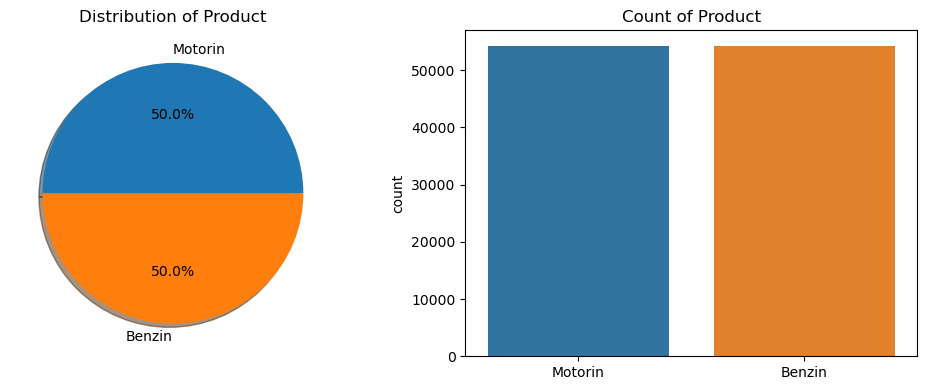

In [11]:
plot_categorical(test,"Area")
plot_categorical(test,"Product")

Numerical Variables

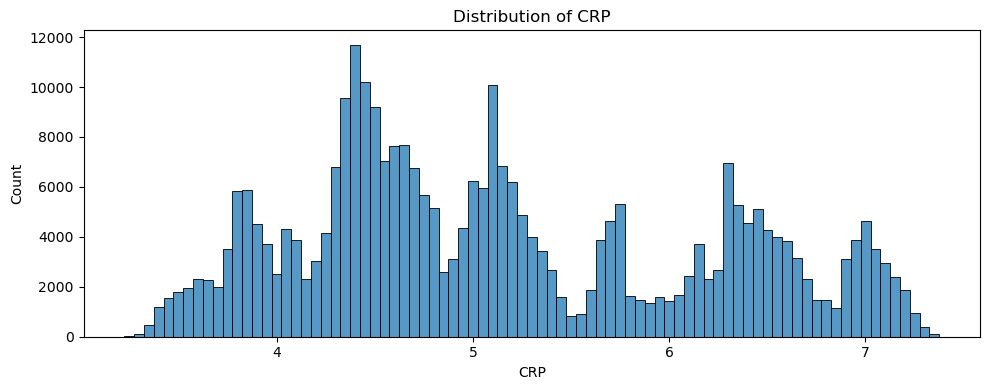

In [12]:
def price_plot(df, column_name):
    f,ax=plt.subplots(figsize=(10,4))
    sns.histplot(x=df[column_name], data=df)
    ax.set_title(f"Distribution of {column_name}")
    plt.tight_layout()
    plt.show()

price_plot(price,"CRP")

# Label: Litres across categorical variables in train set

,Average Litres
Area,
Akdeniz Bölgesi,11639.074745
Doğu Anadolu Bölgesi,13720.433505
Ege Bölgesi,13120.319134
Güneydoğu Anadolu Bölgesi,14149.624302
Karadeniz Bölgesi,12799.962220
Marmara Bölgesi,15299.319045
İç Anadolu Bölgesi,14179.639178


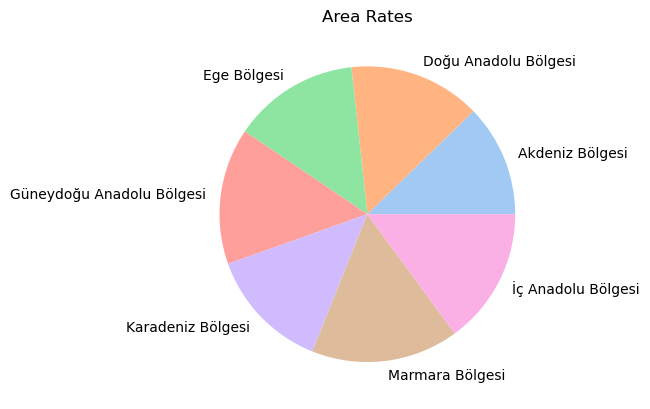

,Average Litres
Product,
Benzin,6605.705182
Motorin,18853.041597


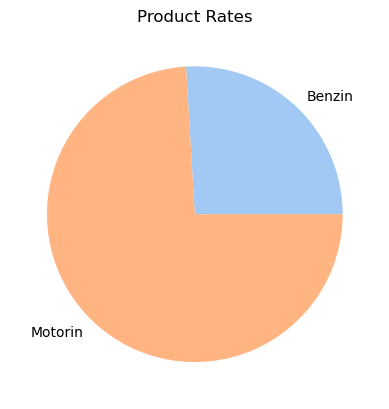

,Average Litres
Plant,
T101,317.780456
T102,15188.207265
T105,14424.097512
T107,12075.486946
T108,14241.828996
T110,11216.813925
T111,13130.874380
T112,12398.605866
T113,11651.709023


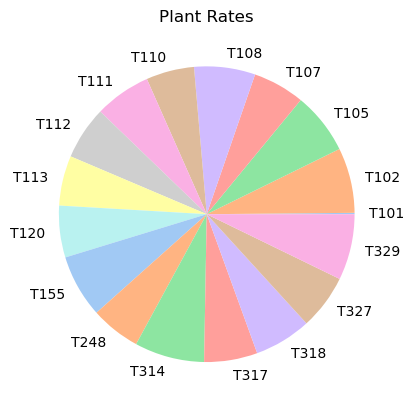

In [13]:
def target_summary(df, target, categorical_col, plot=True):
    df = pd.DataFrame({"Average Litres": df.groupby(categorical_col)[target].mean()})
    display(df)
    
    if plot:
        colors = sns.color_palette('pastel')
        plt.title(f"{categorical_col} Rates")
        plt.pie(x=df.reset_index()["Average Litres"],labels = df.reset_index()[categorical_col],
            data=df, colors = colors)
        plt.show()
        
for col in categorical_cols_train:
    target_summary(train, "Litres", col, plot=True)